In [136]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [137]:
# Load the dataset
bike_sharing_demand_df = pd.read_csv("intro_to_github_dir/project/Bike_Sharing_Demand/bike-sharing-demand.csv")

# Display the first few rows to confirm loading
bike_sharing_demand_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01/01/2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01/01/2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01/01/2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01/01/2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [138]:
#structure of data: columnnes, data type and null vals. Broader picture of the dataset
bike_sharing_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [139]:
# the dataframe has 10886 data point (samples), with 12 columns which are attributes. 11 atributes to describe weather and and bike usage patterns
# Dtype: there is not null values in any column. int64: integers, float64: decimal numb and object(datetime): text or dates as a string
# memory usage in the comp, aprox 1 megabyte
# int64 works like a categorical data because describe numerical codification labels

In [140]:
# columns of the data set
# to know attributes, to verify column names

bike_sharing_demand_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [141]:
# statistical summary 
bike_sharing_demand_df.describe

#temp: real temp, atem: feels like

<bound method NDFrame.describe of                datetime  season  holiday  workingday  weather   temp   atemp  \
0      01/01/2011 00:00       1        0           0        1   9.84  14.395   
1      01/01/2011 01:00       1        0           0        1   9.02  13.635   
2      01/01/2011 02:00       1        0           0        1   9.02  13.635   
3      01/01/2011 03:00       1        0           0        1   9.84  14.395   
4      01/01/2011 04:00       1        0           0        1   9.84  14.395   
...                 ...     ...      ...         ...      ...    ...     ...   
10881  19/12/2012 19:00       4        0           1        1  15.58  19.695   
10882  19/12/2012 20:00       4        0           1        1  14.76  17.425   
10883  19/12/2012 21:00       4        0           1        1  13.94  15.910   
10884  19/12/2012 22:00       4        0           1        1  13.94  17.425   
10885  19/12/2012 23:00       4        0           1        1  13.12  16.665   

     

In [142]:
# null values per column

bike_sharing_demand_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [143]:
# Mostrar filas que tengan al menos un valor nulo
filas_nulas = bike_sharing_demand_df[bike_sharing_demand_df.isna().any(axis=1)]
print(filas_nulas)


Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []


In [144]:
# because there is not null val in columns therefore is not needed to clean the data 

In [145]:
promedio_count = bike_sharing_demand_df["count"].mean()
print(promedio_count)

191.57413191254824


In [146]:
bike_sharing_demand_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [147]:
# Ver categorías únicas de cada variable

print("season:", bike_sharing_demand_df['season'].unique())
print("holiday:", bike_sharing_demand_df['holiday'].unique())
print("workingday:", bike_sharing_demand_df['workingday'].unique())
print("weather:", bike_sharing_demand_df['weather'].unique())

season: [1 2 3 4]
holiday: [0 1]
workingday: [0 1]
weather: [1 2 3 4]


In [148]:
bike_sharing_demand_df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [149]:
bike_sharing_demand_df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [150]:
# holiday(1), no holiday(0)
#Hay 10,575 registros (horas) donde no es un día festivo (0), 311 registros (horas) donde sí es un día festivo (1)

In [151]:
bike_sharing_demand_df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [152]:
# comparation of the use of bikes between holidays and workingdays. target(count column)

<function matplotlib.pyplot.show(close=None, block=None)>

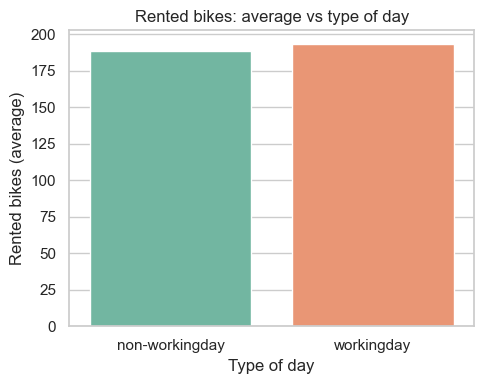

In [153]:
#style
sns.set(style="whitegrid")

# creation of bar charts: average of rented bikes
workingday_avg = bike_sharing_demand_df.groupby("workingday")["count"].mean().reset_index()

# replace 0 and 1 (more readable labels): 
workingday_avg["workingday"]= workingday_avg["workingday"].replace({0:"non-workingday", 1:"workingday"})

# graphic
plt.figure(figsize=(5,4))
sns.barplot(x="workingday", y="count", hue="workingday", data=workingday_avg, palette="Set2", legend=False) 
plt.title("Rented bikes: average vs type of day")
plt.xlabel("Type of day")
plt.ylabel("Rented bikes (average)")
plt.tight_layout()
plt.show

In [156]:
# elimanation of non-numeric column, it´s not needed.
bike_sharing_numerics = bike_sharing_demand_df.drop(columns=["datetime"])

#correlation between attributes (only numeric data)
corr_matrix = bike_sharing_numerics.corr()

#show result
corr_matrix


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<function matplotlib.pyplot.show(close=None, block=None)>

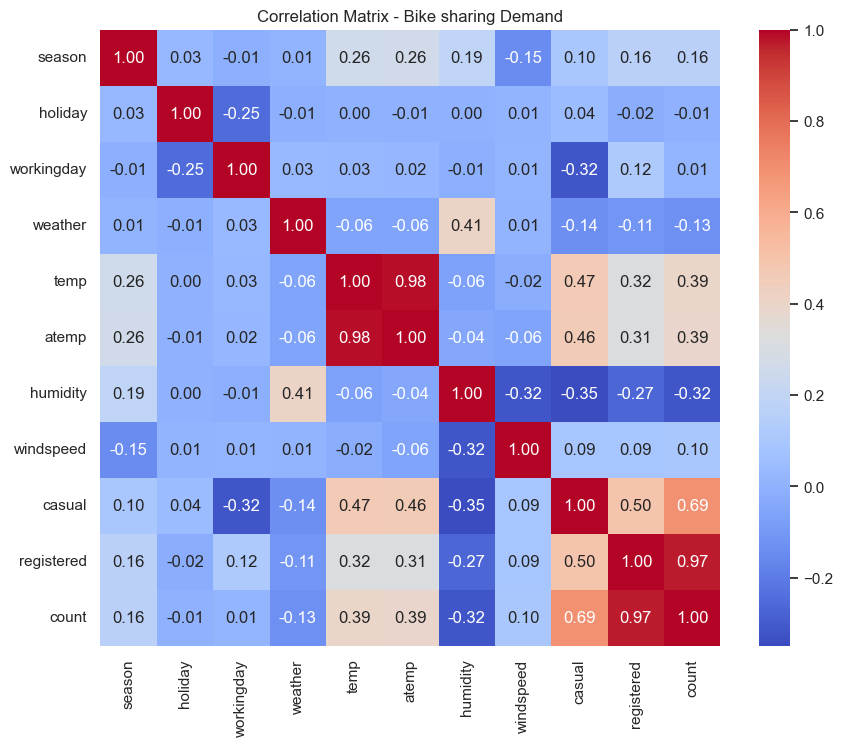

In [160]:
#correlation between all the attributes. the Pearson coefficient shows that: 
#-1, there is a negative correlation, while 1 is positive correlation. 
#value of 0, means there is no correlation between attributes, eg. holiday and temp or windspeed, which show values near 0 
#


#display as a graphic, as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Bike sharing Demand")
plt.show

In [161]:
"!cd"

'!cd'

In [162]:
!cd


C:\Users\g86454lg
